#Trends of Gender MH1 disease incidence 2013-2018

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
        MH1      MH2      MH3  YEAR  GENDER
0  12713079  7454984  2105582  2013       1
1  12698160  7199947  2025647  2013       2
2  13172056  7165549  2545963  2014       1
3  13053222  6916644  2502171  2014       2
4  11568522  6764441  2513512  2015       1
5  11578341  6586879  2524322  2015       2
6  12432866  5264429  1874205  2016       1
7  12419931  4993687  1814705  2016       2
8  14155873  4271147  1328223  2017       1
9  14271128  4173820  1435710  2017       2


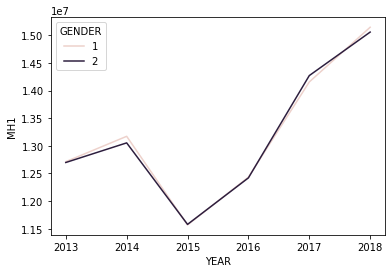

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np
from datetime import datetime as dt
from google.colab import drive
import seaborn as sns

# Mount your Drive to the Colab VM.
from google.colab import  drive
drive.mount('/drive')

df_2013 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2013.csv")
df_2014 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2014.csv")
df_2015 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2015.csv")
df_2016 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2016.csv")
df_2017 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2017.csv")
df_2018 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2018.csv")



dataframes = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
years = ['2013', '2014', '2015', '2016', '2017', '2018']

i = 0 
for dataframe in dataframes:
  dataframe['MH1'] = dataframe['MH1'].apply(lambda x: 0 if x == -9 else x)
  dataframe['MH2'] = dataframe['MH2'].apply(lambda x: 0 if x == -9 else x)
  dataframe['MH3'] = dataframe['MH3'].apply(lambda x: 0 if x == -9 else x)
  dataframe.drop(dataframe.loc[dataframe['GENDER']==-9].index, inplace=True)
  dataframe.drop(dataframe.loc[dataframe['ETHNIC']==-9].index, inplace=True)

#This data creates individual csvs for the frequencies of MH1, MH2, and MH3 diagnoses
#which was later inputted into our 

  df_codes_MH1 = list(dataframe['MH1'].value_counts().index)
  df_frequencies_MH1 = list(dataframe['MH1'].value_counts().values)
  df_codes_and_frequencies_MH1 = pd.DataFrame({'MH1 Code': df_codes_MH1, 'MH1 Count': df_frequencies_MH1})
  name_mh1 = 'df_' + years[i] + '_MH1_codes_and_frequencies.csv'
  path_mh1 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh1
 # df_codes_and_frequencies_MH1.to_csv(path_mh1)

  df_codes_MH2 = list(dataframe['MH2'].value_counts().index)
  df_frequencies_MH2 = list(dataframe['MH2'].value_counts().values)
  df_codes_and_frequencies_MH2 = pd.DataFrame({'MH2 Code': df_codes_MH2, 'MH2 Count': df_frequencies_MH2})
  name_mh2 = 'df_' + years[i] + '_MH2_codes_and_frequencies.csv'
  #path_mh2 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh2

  df_codes_and_frequencies_MH2.to_csv(path_mh2)


  df_codes_MH3 = list(dataframe['MH3'].value_counts().index)
  df_frequencies_MH3 = list(dataframe['MH3'].value_counts().values)
  df_codes_and_frequencies_MH3 = pd.DataFrame({'MH3 Code': df_codes_MH3, 'MH3 Count': df_frequencies_MH3})
  name_mh3 = 'df_' + years[i] + '_MH3_codes_and_frequencies.csv'
  path_mh3 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh3
  #df_codes_and_frequencies_MH3.to_csv(path_mh3)



  i+=1


df_2013_gender = df_2013.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2014_gender = df_2014.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'YEAR':['max']})
df_2015_gender = df_2015.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2016_gender = df_2016.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2017_gender = df_2017.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'YEAR':['max']})
df_2018_gender = df_2018.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})



df_2013_gender['YEAR'] = 2013
df_2014_gender['YEAR'] = 2014
df_2015_gender['YEAR'] = 2015
df_2016_gender['YEAR'] = 2016
df_2017_gender['YEAR'] = 2017
df_2018_gender['YEAR'] = 2018

df_2013_gender['GENDER'] = df_2013_gender.index
df_2014_gender['GENDER'] = df_2014_gender.index
df_2015_gender['GENDER'] = df_2015_gender.index
df_2016_gender['GENDER'] = df_2016_gender.index
df_2017_gender['GENDER'] = df_2017_gender.index
df_2018_gender['GENDER'] = df_2018_gender.index



df_2013_gender.columns = df_2013_gender.columns.get_level_values(0)
df_2014_gender.columns = df_2014_gender.columns.get_level_values(0)
df_2015_gender.columns = df_2015_gender.columns.get_level_values(0)
df_2016_gender.columns = df_2016_gender.columns.get_level_values(0)
df_2017_gender.columns = df_2017_gender.columns.get_level_values(0)
df_2018_gender.columns = df_2018_gender.columns.get_level_values(0)




pieces = (df_2013_gender, df_2014_gender, df_2015_gender, df_2016_gender, df_2017_gender, df_2018_gender)

final_df = pd.DataFrame(np.concatenate([df_2013_gender.values, df_2014_gender.values, df_2015_gender.values, df_2016_gender.values, df_2017_gender.values, df_2018_gender.values]), columns = df_2018_gender.columns)
print(final_df.head(10))



sns.lineplot(data=final_df, x="YEAR", y="MH1", hue="GENDER")
# sns.histplot(data=df_2018, x="MH1", hue="ETHNIC")



# sns.barplot(data=df_2020_gender, x="YEAR", y="MH1", hue=df_2020_gender.index)


# sentiment_jan_2021_ntlk.to_csv('/drive/My Drive/sentiment_jan_2021_ntlk.csv')
# sentiment_jan_2021_textblob.to_csv('/drive/My Drive/sentiment_jan_2021_textblob.csv')

#Naive Bayes Classifer: Multifeature, Single Label Output

---



In [34]:
import pandas as pd
from google.colab import  drive
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.naive_bayes import GaussianNB
import unittest
import scipy

from sklearn.model_selection import train_test_split

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:7]).to_list()
df_features = df.iloc[:,2:7].values
df_label_names = (df_columns[26:27]).to_list()
df_label = df.iloc[:, 26:27].values
print("Features tested: ", df_feature_names)
print("Labels tested: ", df_label_names)


train, test, train_labels, test_labels = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)
print(train.shape)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)          

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels.ravel())

test_to_predict = [[4,3,2,2,2]]
# Make predictions
preds = gnb.predict(test_to_predict)
print(preds) #no ADHD in this case

accuracy = model.score(train, train_labels)
print("The accuracy is", accuracy)


class TestTrainAndLabels(unittest.TestCase):

  def test_TrainShapeEqualToLabels(self):
      #the shape of the train dataset must be congruent with the number of rows of the 
      #labels
  
    train_1, test_1, train_labels_1, test_labels_1 = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)  
    
    train_1_shape = train_1.shape
    train_labels_1_shape = train__labels_1_shape = train_labels_1.shape

    self.assertEqual(train_1_shape[0], train_labels_1_shape[0]) #OK

  def test_OneLabelOutput(self):

      #Scikit NB only takes one column output 
    train_2, test_2, train_labels_2, test_labels_2 = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)  

    train_2_shape = train_2.shape
    train_labels_2_shape = train_labels_2.shape

    self.assertEqual(train_labels_2_shape[1], 1) #OK

  def test_accuracyGreaterThanEightyPercent(self):

    #Ascertaining Accurary greater than 80%
    #to determine how reliable it is. 

    self.assertGreater(accuracy, 0.8)

  
  def test_PredictionSize(self):

    #Prediction input needs to fit the same shape
    #as the features

    preds_size = len(test_to_predict[0])
    features_size = len(df_feature_names)


    self.assertEqual(preds_size, features_size) #OK

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)       

....
----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK
....

Features tested:  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER']
Labels tested:  ['ADHDFLG']
(25000, 5)
[0]
The accuracy is 0.89104



----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


#KNN: Multifeature, Multi Label Output

In [ ]:
import pandas as pd
from google.colab import  drive
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.model_selection import train_test_split




df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:15]).to_list()
print("Features to be analyzed ", df_feature_names)
df_features = df.iloc[:,2:15].values
df_label_names = (df_columns[26:36]).to_list()
df_labels = df.iloc[:, 26:36].values
print("Labels to be analyzed", df_label_names)

#Input


# Split our data
train, test, train_labels, test_labels = train_test_split(df_features,
                                                          df_labels,
                                                          test_size=0.25,
                                                          random_state=42)

row = [[3, 2, 3, 5, 2, 1, 1, 1, 2, 1, 1,1,6]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(train, train_labels)
result = knn.predict(row)
print("Prediction is ", result)
# accuracy on X_test
accuracy = knn.score(train, train_labels)
print("The accuracy is", accuracy)



Features to be analyzed  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3']
Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
Prediction is  [[0 0 0 0 1 0 0 0 0 0]]
The accuracy is 0.9034666666666666


#Multilabel Classification Using Adam

The Adam optimization algorithm is used, as opposed to stochastic gradient descent, which stands for Adaptive Moment Estimation. Unlike stochastic gradients, which use single learning rates, here the Adam algorithm implements both Adaptive Gradient Algorithm and Root Mean Square Propagation. These two mechanisms calculacate an exponential moving average of the gradient and the squared gradient. 

In [ ]:

# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd 

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=10)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:7]).to_list() + (df_columns[37:38]).to_list() + (df_columns[16:17]).to_list() +  (df_columns[19:20]).to_list()
print("Features to be analyzed ", df_feature_names)
df_features = pd.concat([df.iloc[:,2:7], df.iloc[:,37:38], df.iloc[:,16:17], df.iloc[:,19:20]], axis = 1)
#Features to be analyzed  ['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE']
df_label_names = (df_columns[26:36]).to_list()
print("Labels to be analyzed", df_label_names)
df_labels = df.iloc[:, 26:36].values
#Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
print(df_features)
# results = evaluate_model(df_features, df_labels)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

n_inputs, n_outputs = df_features.shape[1], df_labels.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(df_features, df_labels, verbose=0, epochs=10)
# make a prediction for new data
row = [9, 4, 3, 5, 2, 6, 4, 1]
#Prediction for a 40-44 year old, High School Educated, Hispanic (other than Mexico or Puerto Rico), White in Ethnicity, Female), From California, Divorced
newX = list([row])
yhat = model.predict(newX)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
print('Predicted: %s' % yhat[0])



# row = [9, 4, 3, 5, 2]
#Prediction for a 40-44 year old, High School Educated, Hispanic (other than Mexico or Puerto Rico), White in Ethnicity, Female), Divorced

Features to be analyzed  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'STATEFIP', 'MARSTAT', 'EMPLOY']
Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
       AGE  EDUC  ETHNIC  RACE  GENDER  STATEFIP  MARSTAT  EMPLOY
0       14    -9       4     5       2        55       -9      -9
1        1     2       4     3       2        24        1      -9
2        9    -9       4     2       2        55       -9       5
3        3     3       4     6       1        16        1      -9
4        2    -9       4     5       1        39        1      -9
...    ...   ...     ...   ...     ...       ...      ...     ...
49995   11     5       4     5       1        12        1       4
49996    8     5       4     3       2         8        1       1
49997    6    -9       4     5       1        41       -9      -9
49998    1     2       4     5       1        12        1      -9
49999    2    -9      

Choropleth Map Showing MH1 Incidence Nationwide 2018

In [33]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")

lat_long_states = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/statelatlong.csv")

#you may run into dependcy issues because of geojson, but it works in Jupyter and Sublime
us_geo_json = 'https://usgeojson.s3.us-east-2.amazonaws.com/states.geojson'


lat_states_only = list(lat_long_states['Latitude'])
long_states_only = list(lat_long_states['Longitude'])
state_abrs = list(lat_long_states['State'])
state_value_index = list(lat_long_states['Identifier'])


state_lookup_dict = {}
i = 0
while i < len(state_value_index):
  state_abr = state_abrs[i]
  state_value = str(state_value_index[i])
  lat_for_state = lat_states_only[i]
  long_for_state = long_states_only[i]
  state_lookup_dict[state_value] = [state_abr, lat_for_state, long_for_state]
  i+=1

state_lookup_dict['72'] = ['PR', '18.466333', '-66.105721']

def get_coordinates(id, desired_type = 'state_abbreviation'):
  id_to_str = str(id)
  state_abbreviation = state_lookup_dict[id_to_str][0]
  state_latitude = state_lookup_dict[id_to_str][1]
  state_longitude = state_lookup_dict[id_to_str][2]
  if (desired_type == 'longitude'):
    return state_longitude
  elif (desired_type == 'latitude'):
    return state_latitude
  elif (desired_type == 'state_abbreviation'):
    return state_abbreviation

  # print(state_abbreviation, state_latitude, state_longitude)

# df['val'] = df.apply(lambda x: type_dict[x['type']], axis=1)


df['LONGITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'longitude'))
df['LATITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'latitude'))
df['STATEABR'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'state_abbreviation'))


grouped_df = df.groupby(['STATEABR']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'LONGITUDE':['max'], 'LATITUDE':['max']})
# print(grouped_df.columns)
with urlopen(us_geo_json) as response:
     states = json.load(response)
        



grouped_df.columns = grouped_df.columns.get_level_values(0)
grouped_df = grouped_df[grouped_df['MH1'] > 0]


grouped_df['STATEABR'] = grouped_df.index
print(grouped_df.columns)

print(grouped_df.head())

fig = px.choropleth(grouped_df, geojson=states, locations='STATEABR',
                           hover_name = "MH1",
                           scope = "usa",
                           title = "Total Cases"
                          )

fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = grouped_df['LONGITUDE'],
            lat = grouped_df['LATITUDE'],
            text = grouped_df['MH1'],
            name = 'MH1',
            mode = 'markers',
            marker = dict(
                size = grouped_df['MH1'],
                color= ["orange"]
                line_width = 0,
                sizeref = 9,
                sizemode = "area"
            )))


fig.show()



Index(['MH1', 'MH2', 'MH3', 'LONGITUDE', 'LATITUDE', 'STATEABR'], dtype='object')
            MH1    MH2    MH3 LONGITUDE LATITUDE STATEABR
STATEABR                                                 
AL         5721  -5149  -6945  -86.6807   32.601       AL
AR         4000  -8185 -13809  -92.1314  34.7519       AR
AZ         2309  -4516  -5525  -111.931  34.1682       AZ
CA        37805 -28819 -46510   -119.27  37.2719       CA
CO         6279  -5325  -8635  -105.551  38.9979       CO


TypeError: ignored